In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('Heart Disease.csv')

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


<AxesSubplot:>

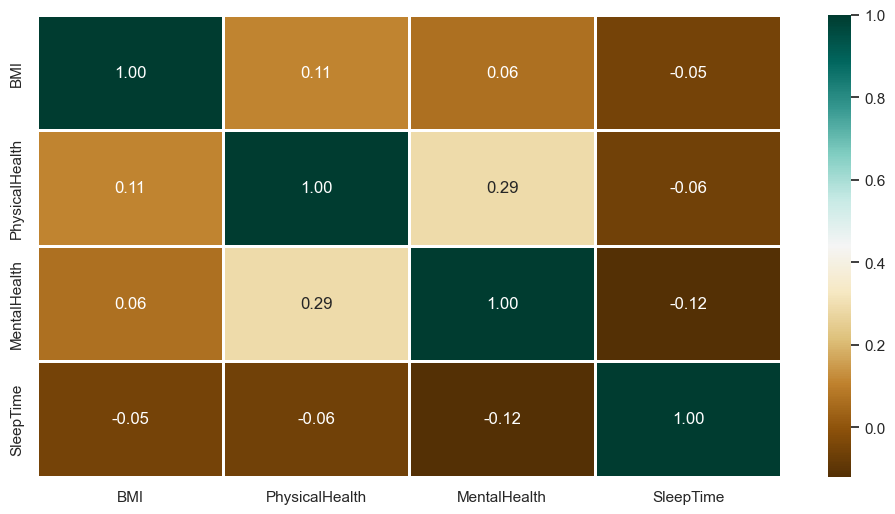

In [5]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

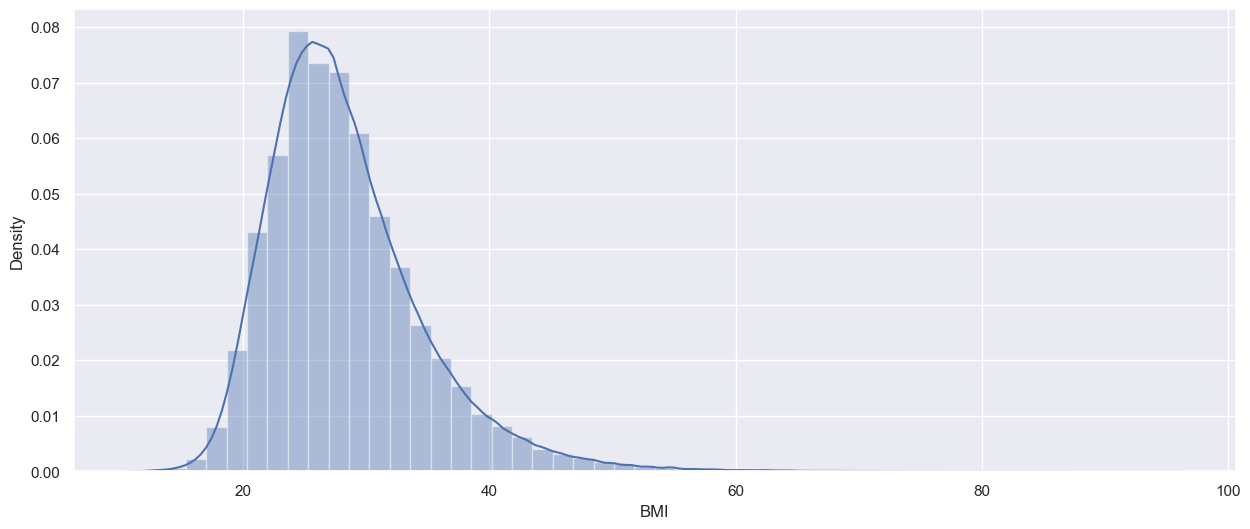

In [6]:
plt.figure(figsize=(15, 6))
sns.distplot(df['BMI'], bins=50)

<AxesSubplot:xlabel='BMI', ylabel='count'>

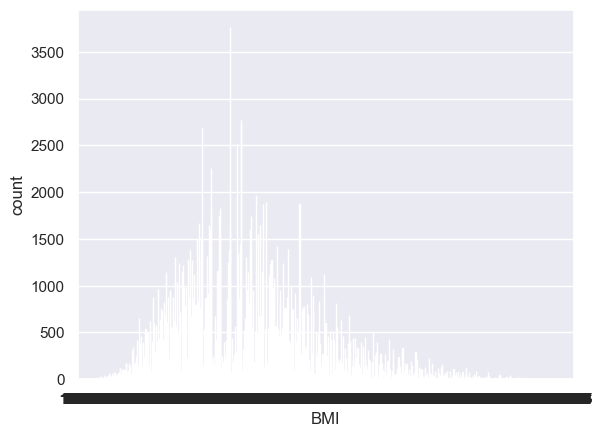

In [7]:

sns.countplot(x='BMI', data=df)

In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


# Explore Data

In [9]:

df.drop_duplicates(inplace=True)

In [10]:
df.shape

(301717, 18)

In [11]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

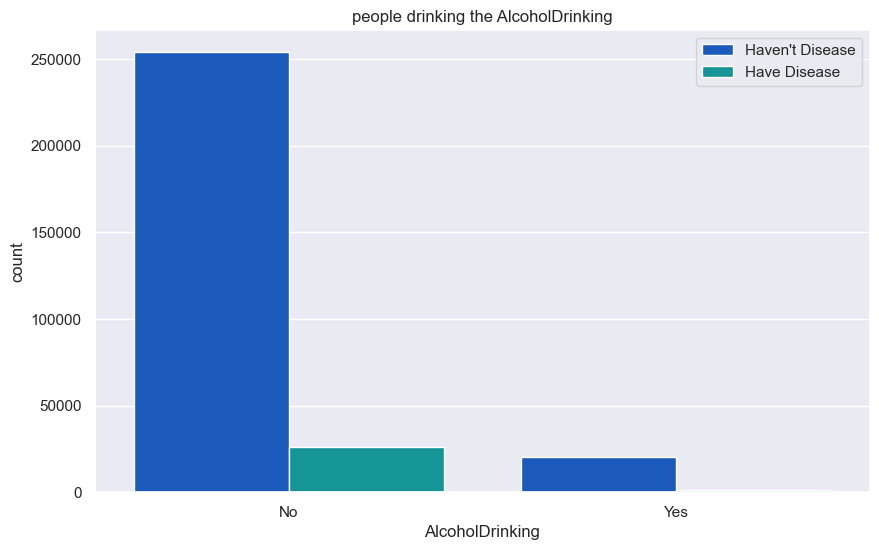

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [13]:
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

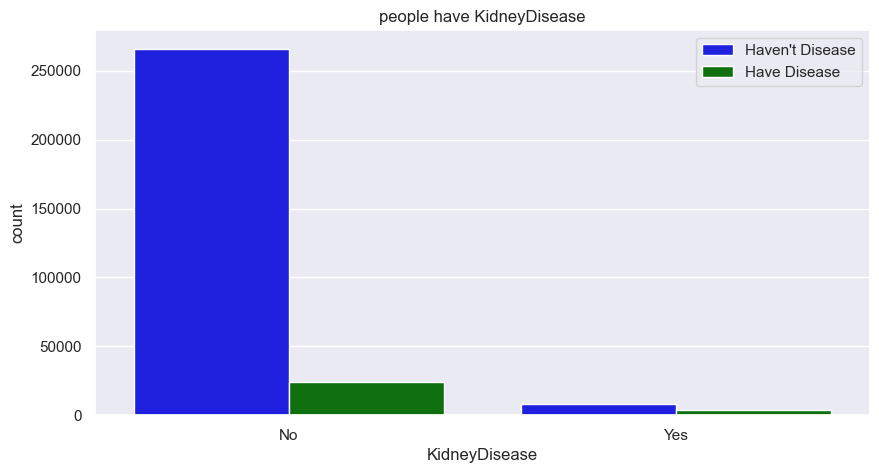

In [14]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [15]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [16]:
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [17]:
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

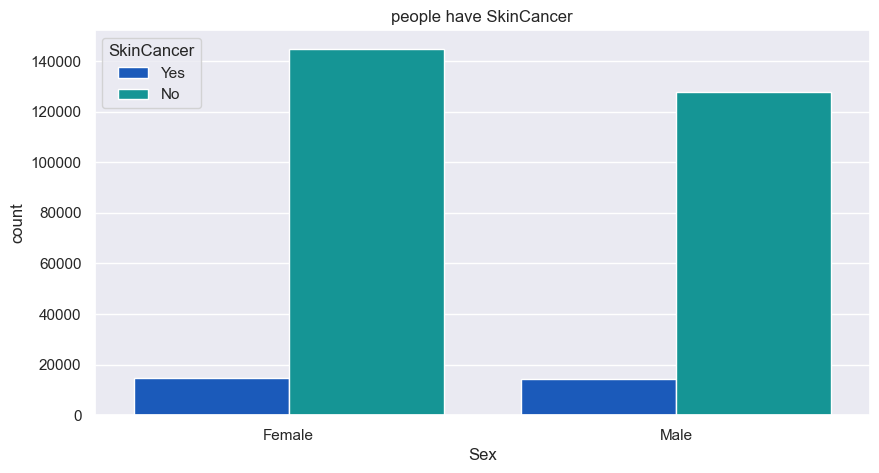

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter',color='blue')
plt.title('people have SkinCancer')
plt.show()

In [19]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

# Label Encoding

In [20]:
label = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [21]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [22]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.75,random_state=42) 

In [24]:
Clf = DecisionTreeClassifier() 

In [25]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [26]:
Clf.score(xtest,ytest) 

0.8532811878562906

In [27]:
Clf.score(x,y) 

0.9613114275960586

# Over Sampling

In [28]:
over = RandomOverSampler(random_state=42)

In [29]:
x_new , y_new = over.fit_resample(x,y)

# Hold Out Cross Validation

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [31]:
dt = DecisionTreeClassifier() 

In [32]:
dt.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [33]:
dt.score(xtest,ytest)

0.950410994840703

In [34]:
dt.score(xtrain,ytrain) 

0.9979328805588753

# Stochastic Gradient Descent

In [35]:
from sklearn.linear_model import SGDClassifier

In [36]:
sgd = SGDClassifier()

In [37]:
sgd.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [38]:
y_pred = sgd.predict(xtest)

In [39]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

# Naive Bayes algorithm 

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()

In [42]:
nb.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [43]:
y_pred = nb.predict(xtest)

In [44]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

# XGBoost (ACC:78%)

In [45]:
import xgboost as xgb

In [46]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(xtrain ,ytrain)

pred = model_xgb.predict(xtest)
confusion = confusion_matrix(ytest, pred)
acc = accuracy_score(ytest, pred)
print('Accuracy Score:',int(acc*100),'%')

Accuracy Score: 78 %


# Without sampling¶

In [47]:
x.shape

(301717, 17)

In [48]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [49]:
dt.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [50]:
dt.score(xtest1,ytest1)

0.8537186795704627

# Random Forest

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979255934163096
Testing accuracy: 0.966799778470866


In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.786387131877848
Testing accuracy: 0.7804456816393156


# K Fold Cross Validation

In [55]:
kfold = KFold(n_splits=5, shuffle=True) 

In [56]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [57]:
result

array([0.78145979, 0.78345463, 0.77888907, 0.78242335, 0.78154889])

In [58]:
result.mean()

0.781555145808198

In [59]:
result.max()

0.7834546332310103

In [60]:
result.min()

0.7788890710681168

# Dimensionality Reduction and PCA

In [61]:
mmx = MinMaxScaler()

In [62]:
scaled_x = mmx.fit_transform(x_new)

In [63]:
scaled_x.shape

(548912, 17)

In [64]:
scaled_x

array([[0.05529398, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.1004467 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17578172, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.11807316, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12507546, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2075335 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [67]:
x_pca

array([[ 0.257483  ,  0.14396727, -0.78746685],
       [-0.42219725,  0.57903381, -0.07811073],
       [ 0.35696486, -0.54518523, -0.1854774 ],
       ...,
       [-0.15515716,  0.01235403, -0.87539326],
       [-0.07856754, -0.8430581 , -0.10719973],
       [-0.69636898, -0.19471019,  0.42417832]])

In [68]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [70]:
xtrain

,pca1,pca2,pca3
78195,-0.645742,0.629618,-0.154495
17062,-0.578681,0.615943,-0.158563
158180,-0.660491,0.647821,-0.145573
333159,-0.185870,-0.753934,-0.202766
357122,-0.315197,-0.721514,-0.268613
...,...,...,...
110268,-0.704542,-0.195771,0.422565
259178,0.499908,0.356101,-0.648357
365838,1.234750,-0.489928,0.427387
131932,0.816468,0.991360,0.351171


# KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(xtrain, ytrain)
testing_score= knn.score(xtest, ytest) 
print("Testing score:", testing_score)
training_score= knn.score(xtrain, ytrain)  
print("Training score:", training_score)

Testing score: 0.7509685803466243
Training score: 0.7562266095492898


# XGBClassifier

In [72]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7643439743075906
Testing accuracy: 0.757581646161507


# RandomForestClassifier

In [73]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979309698676341
Testing accuracy: 0.9575707154742097


# ExtraTreesClassifier

In [74]:
extr = ExtraTreesClassifier()
extr.fit(xtrain, ytrain)
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.9715923582350584
Training Score: 0.9979361749748854


# DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier() 
dt.fit(xtrain,ytrain)
test_score= dt.score(xtest,ytest)
print("Testing Score:", test_score)
train_score= dt.score(xtrain,ytrain) 
print("Training Score:", train_score)

Testing Score: 0.9475812818052637
Training Score: 0.9979361749748854


In [76]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.47383565526157706, 0.9907407407407407, 'X[0] <= -0.046\ngini = 0.5\nsamples = 384238\nvalue = [192313, 191925]'),
 Text(0.19076999718388413, 0.9722222222222222, 'X[1] <= -0.185\ngini = 0.464\nsamples = 222287\nvalue = [141072, 81215]'),
 Text(0.068689147119089, 0.9537037037037037, 'X[2] <= -0.285\ngini = 0.495\nsamples = 76965\nvalue = [34468, 42497]'),
 Text(0.013138035147305981, 0.9351851851851852, 'X[0] <= -0.327\ngini = 0.41\nsamples = 15118\nvalue = [10771, 4347]'),
 Text(0.0025801718666669886, 0.9166666666666666, 'X[0] <= -0.353\ngini = 0.192\nsamples = 5410\nvalue = [4827, 583]'),
 Text(0.001022661732957082, 0.8981481481481481, 'X[0] <= -0.375\ngini = 0.131\nsamples = 3184\nvalue = [2960, 224]'),
 Text(0.0005391482484373016, 0.8796296296296297, 'X[1] <= -0.691\ngini = 0.074\nsamples = 1533\nvalue = [1474, 59]'),
 Text(0.0003594321656248677, 0.8611111111111112, 'X[0] <= -0.413\ngini = 0.064\nsamples = 1452\nvalue = [1404, 48]'),
 Text(0.0001347870621093254, 0.842592592592

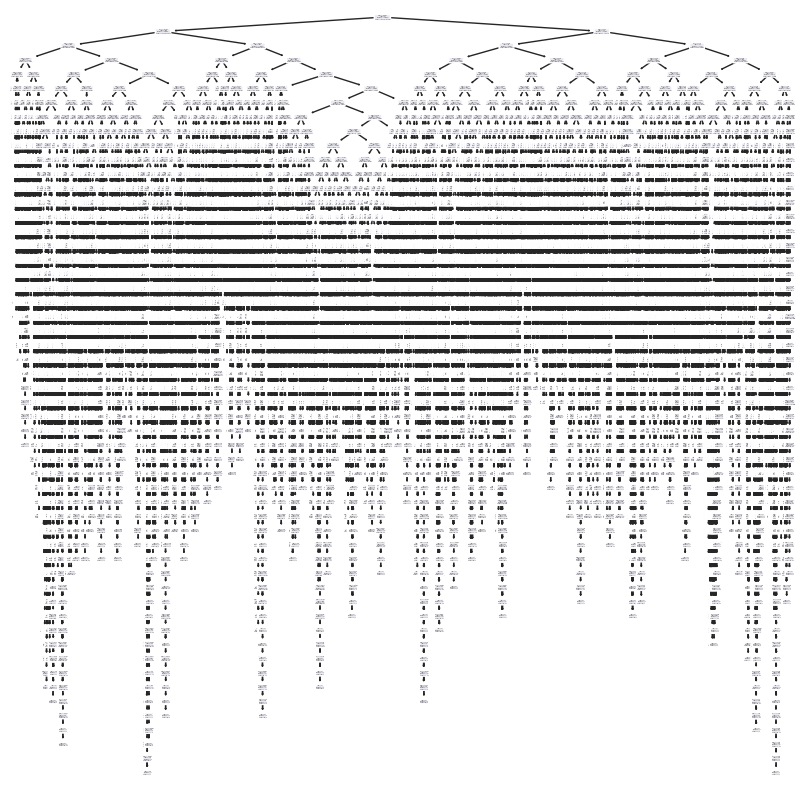

In [77]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt,rounded= True)

# LogisticRegression

In [78]:
lg = LogisticRegression()

lg.fit(xtrain, ytrain)

test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)

train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.6815647886126529
Training Score: 0.6818742550190247


# Support Vector Machine (SVM)

In [79]:
from sklearn import svm
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(xtrain, ytrain)
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

Training Score: 0.6663057792305811
Testing Score: 0.6657699454680156


# Statistical classification Model

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(),
}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Decision Tree Accuracy: 0.9487
Random Forest Accuracy: 0.9641
Logistic Regression Accuracy: 0.7463
ExtraTreesClassifier Accuracy: 0.9715
XGBClassifier Accuracy: 0.7792
